## Importing necessary libraries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

In [174]:
df = pd.read_csv('train.csv')
print(df.shape)

(16999, 1025)


In [175]:
print(df.columns)

Index(['4', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.553', '0.554', '0.555', '0.556', '0.557', '0.558', '0.559', '0.560',
       '0.561', '0.562'],
      dtype='object', length=1025)


In [176]:
df.head(n = 10)

,4,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
data = df.values
print(data.shape)

(16999, 1025)


In [178]:
X = data[:,1:]
y = data[:,0]
print(X.shape,y.shape)

split = int(0.7 * X.shape[0])   # Splitting our dataset into two parts.The first 80% will be used for training the model and the rest 20% will be used to predicting the output.
print(split)

(16999, 1024) (16999,)
11899


In [179]:
X_train = X[:split, :]
X_test = X[split:,  :]

y_train = y[:split]
y_test = y[split:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

df = pd.DataFrame(X_test)
df.to_csv('test.csv')

(11899, 1024) (11899,)
(5100, 1024) (5100,)


## Visualizing Training Data

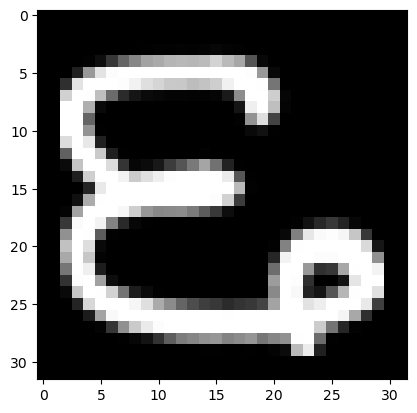

6


In [180]:
def drawImg(sample):               
    img = sample.reshape((32,32))    
    plt.imshow(img,cmap = 'gray')
    plt.show()
    

drawImg(X_train[2])
print(y_train[2])

## Implementing KNN

In [181]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def knn(X,Y,query_point,k=5 ):
    vals=[]
    m=X_train.shape[0]
    
    for i in range(m):
        d=euclidean_distance(query_point,X[i])
        vals.append((d,Y[i])) 
            
    vals=sorted(vals)
    #print(vals)
    #Nearest/First k points
    vals=vals[:k]
    
    vals=np.array(vals)
    #print(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

In [182]:
X_test=X_test[:50]   # Taking the first 50 rows from X_test
y_test=y_test[:50]   # Taking the first 50 rows from y_test
print(X_test)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[3 4 2 7 3 8 2 8 8 9 4 6 6 7 5 8 4 1 1 3 9 8 3 7 5 0 5 5 2 7 9 1 7 3 5 1 5
 4 5 9 0 7 9 0 8 1 8 8 4 6]


## Making Predictions

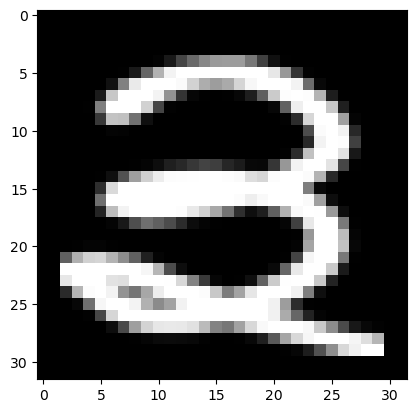

Label: 3.0


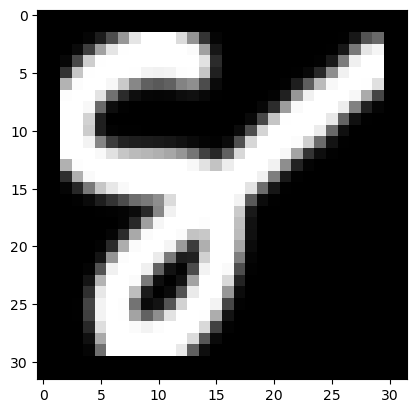

Label: 4.0


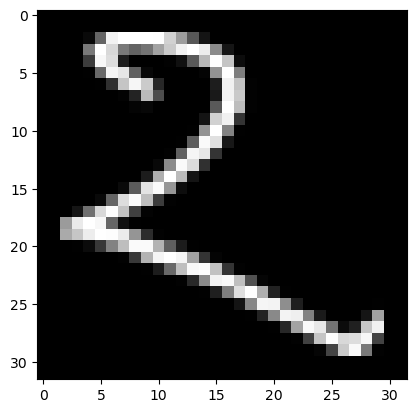

Label: 2.0


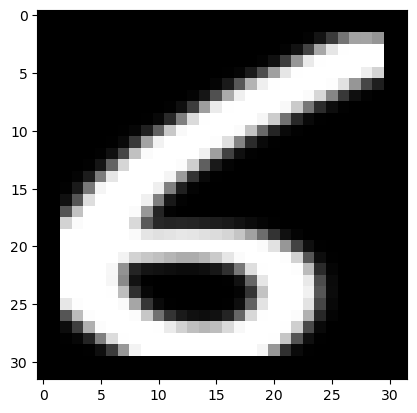

Label: 7.0


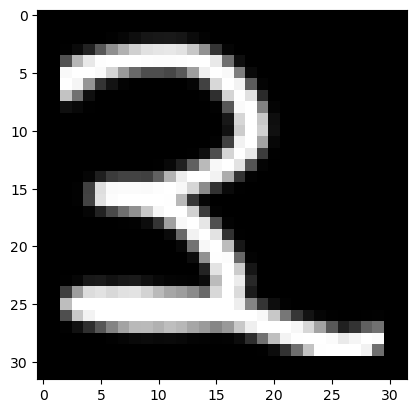

Label: 3.0


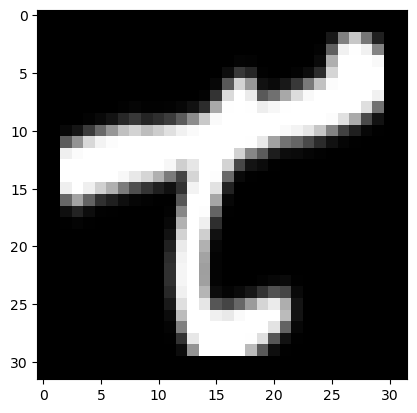

Label: 8.0


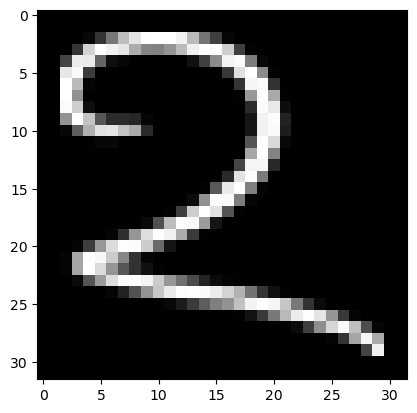

Label: 2.0


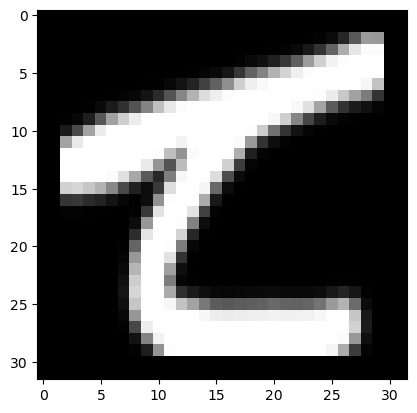

Label: 8.0


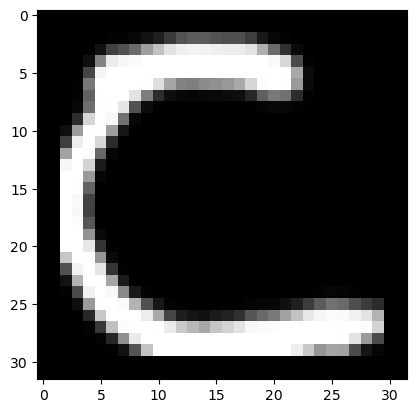

Label: 8.0


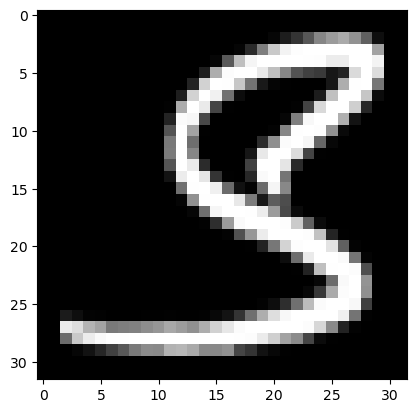

Label: 9.0


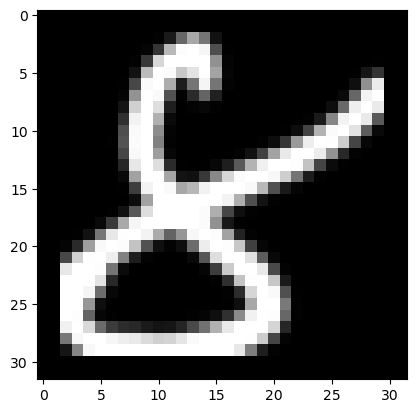

Label: 4.0


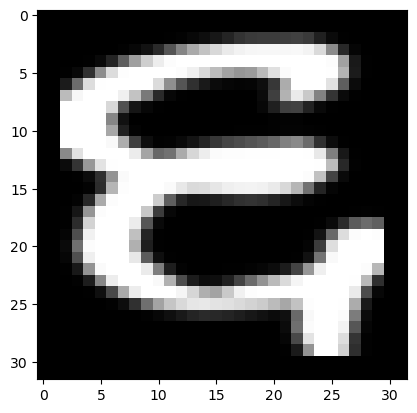

Label: 6.0


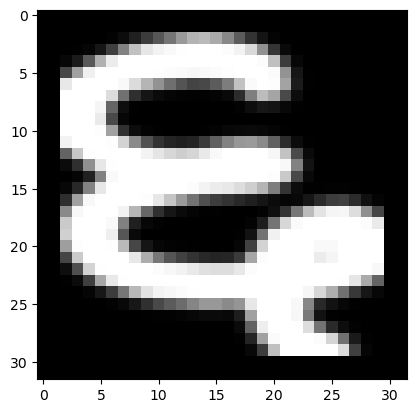

Label: 6.0


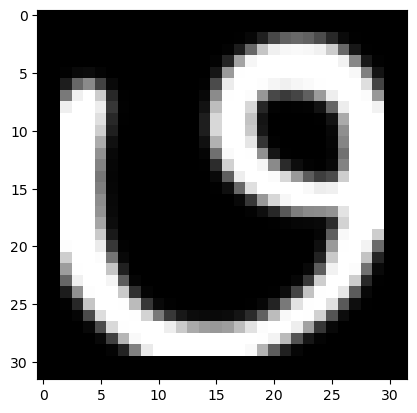

Label: 7.0


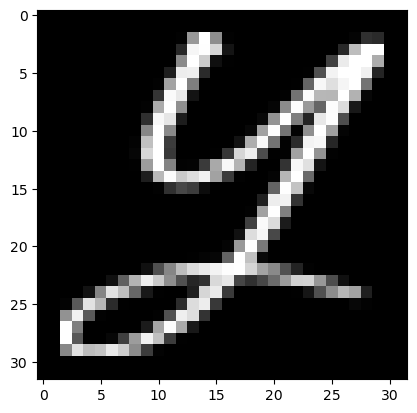

Label: 5.0


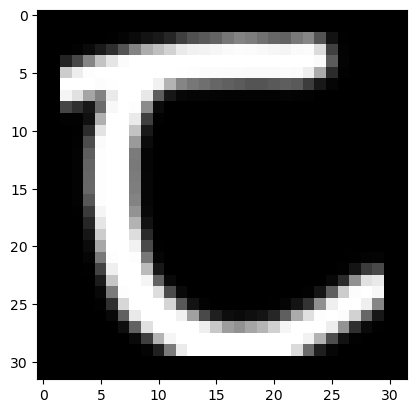

Label: 8.0


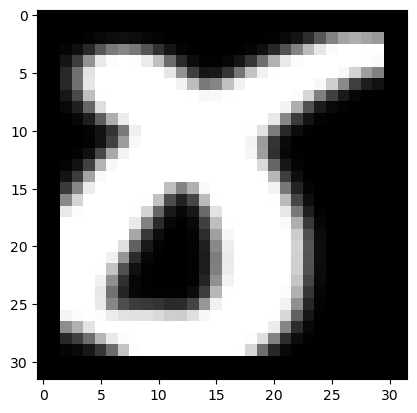

Label: 4.0


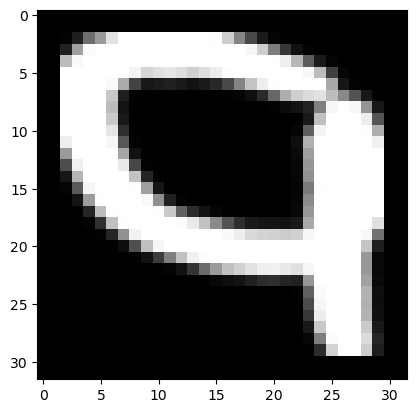

Label: 1.0


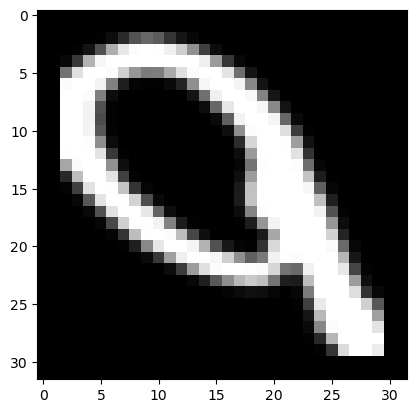

Label: 1.0


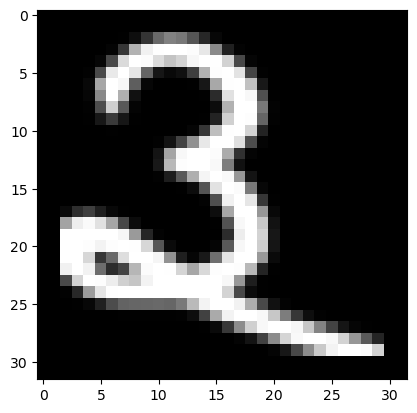

Label: 3.0


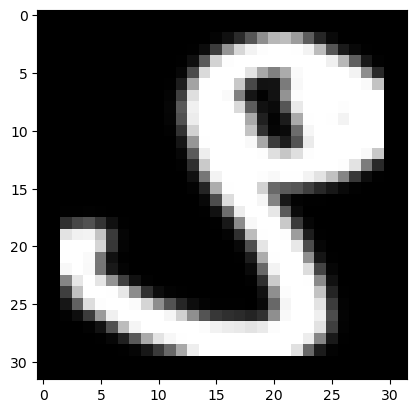

Label: 9.0


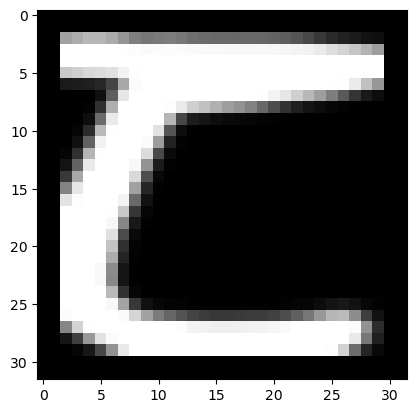

Label: 8.0


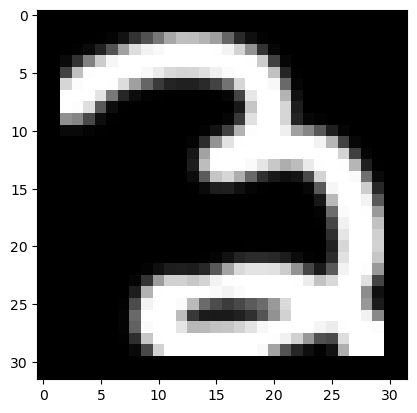

Label: 3.0


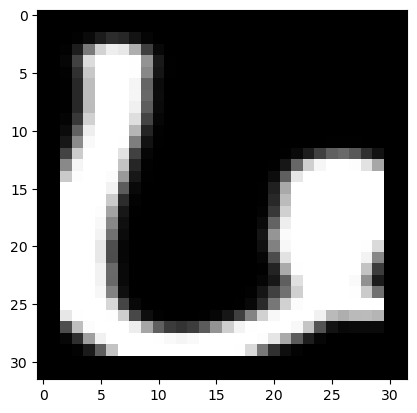

Label: 7.0


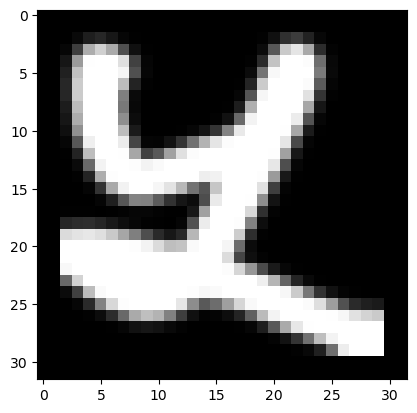

Label: 5.0


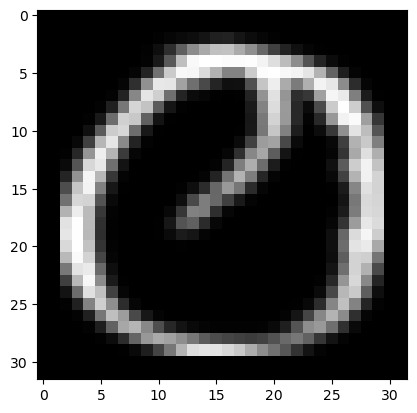

Label: 0.0


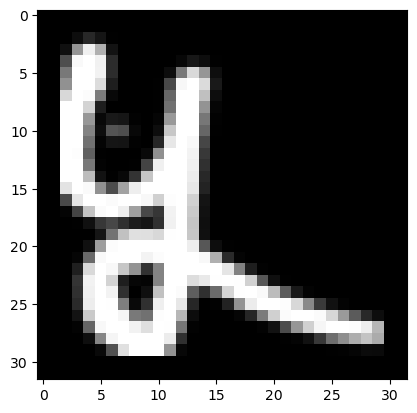

Label: 5.0


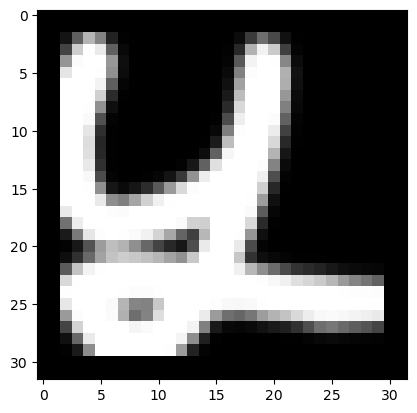

Label: 5.0


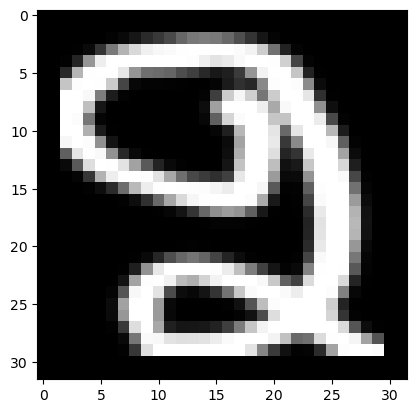

Label: 2.0


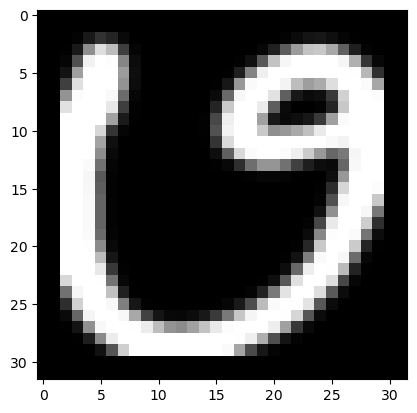

Label: 7.0


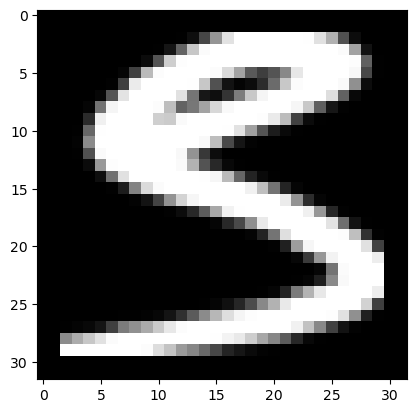

Label: 9.0


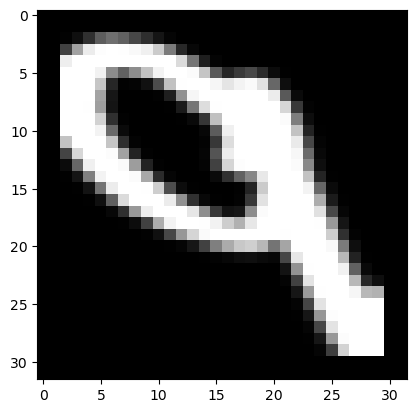

Label: 1.0


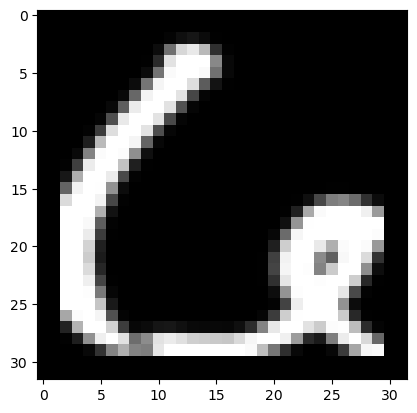

Label: 7.0


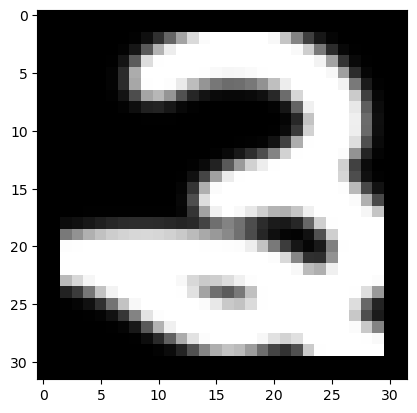

Label: 3.0


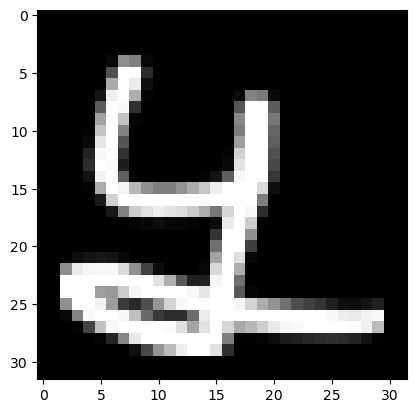

Label: 5.0


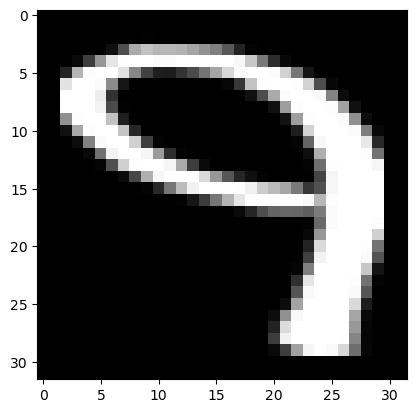

Label: 1.0


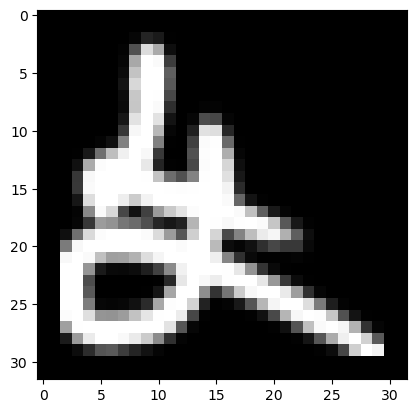

Label: 5.0


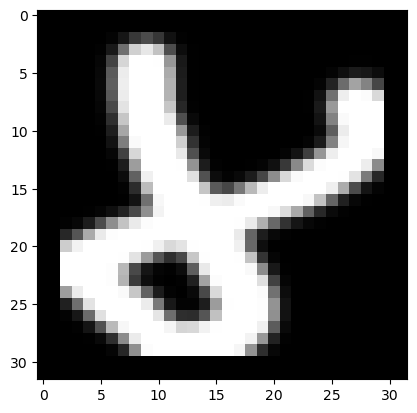

Label: 4.0


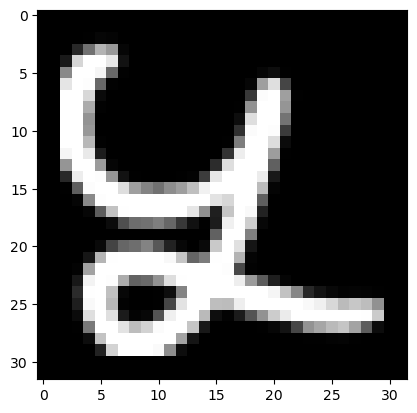

Label: 5.0


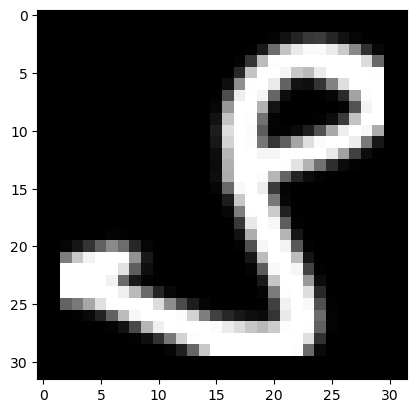

Label: 9.0


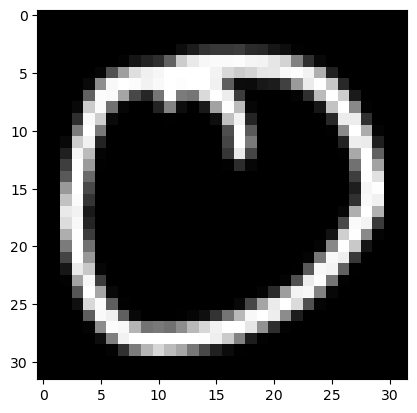

Label: 0.0


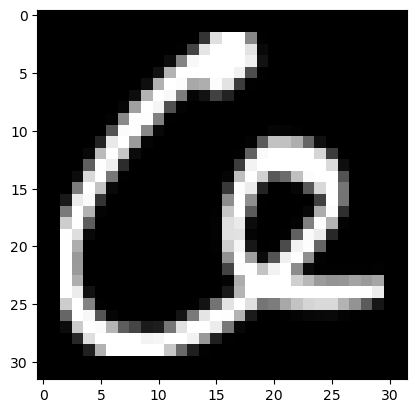

Label: 0.0


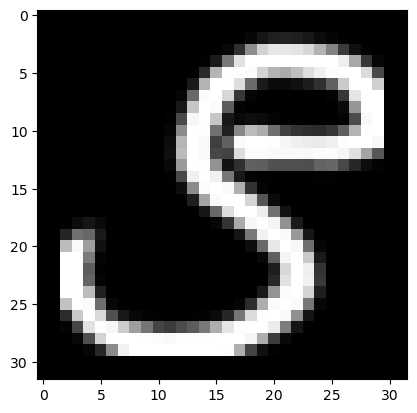

Label: 9.0


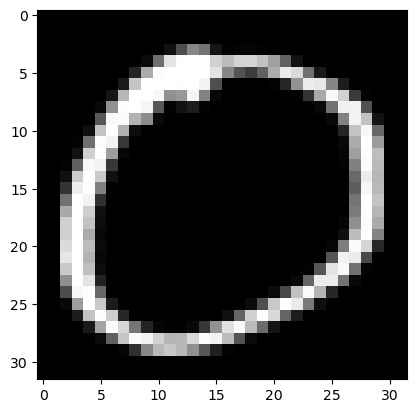

Label: 0.0


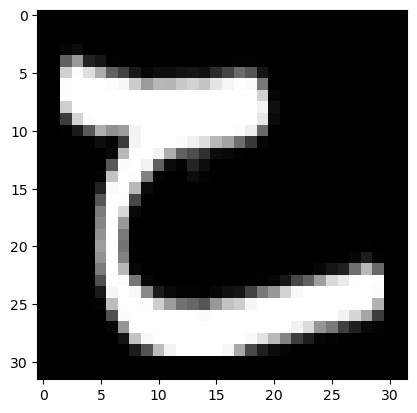

Label: 8.0


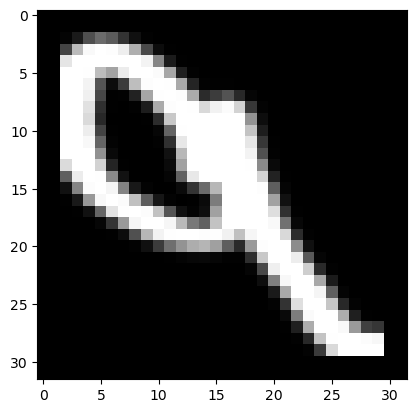

Label: 1.0


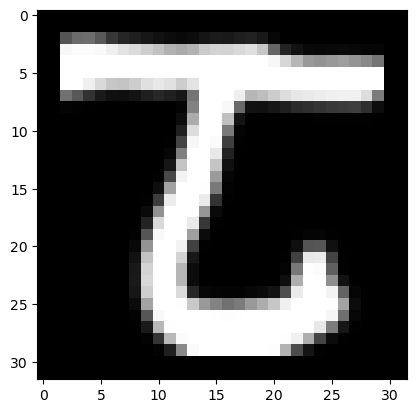

Label: 8.0


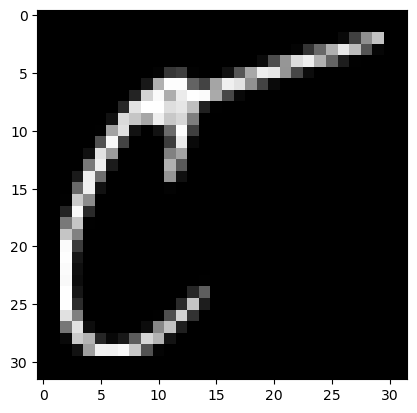

Label: 8.0


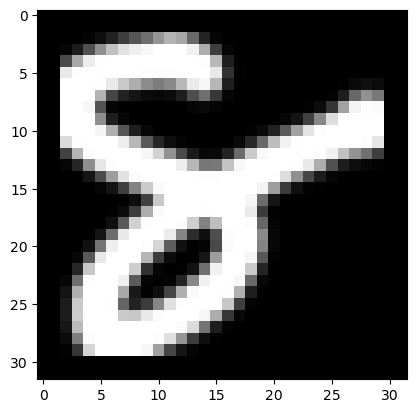

Label: 4.0


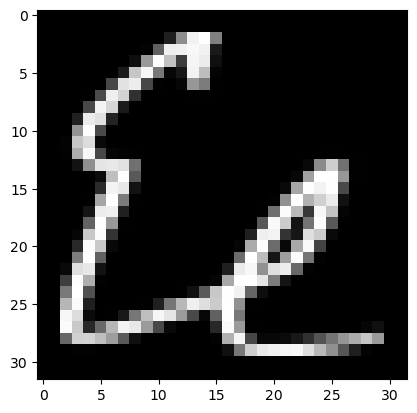

Label: 6.0


In [183]:
for test in X_test:
    drawImg(test)
    print("Label:", knn(X_train, y_train, test))

## Finding Accuracy

In [184]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k = 5):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [185]:
accuracy = calculate_accuracy(X_test,y_test,X_train,y_train,5)

print(accuracy)

0.98
